<a href="https://colab.research.google.com/github/Pakhi27/YouTubeToxicComments-Neural-Network/blob/main/You_Tube_Toxic_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
df=pd.read_csv('youtoxic_english_1000.csv')

In [3]:
dataet=pd.DataFrame(df)

In [4]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# EDA

In [5]:
# Missing Values
df.isnull()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

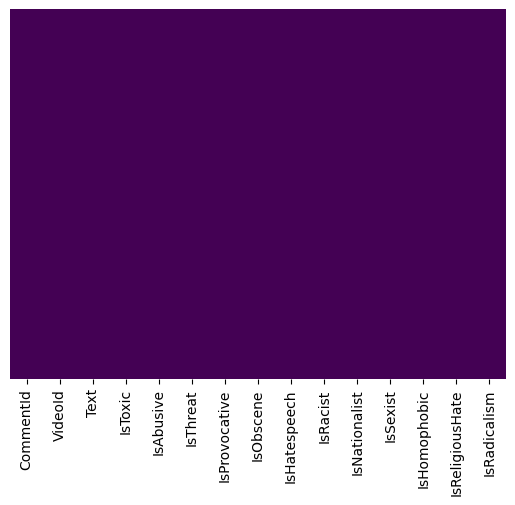

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

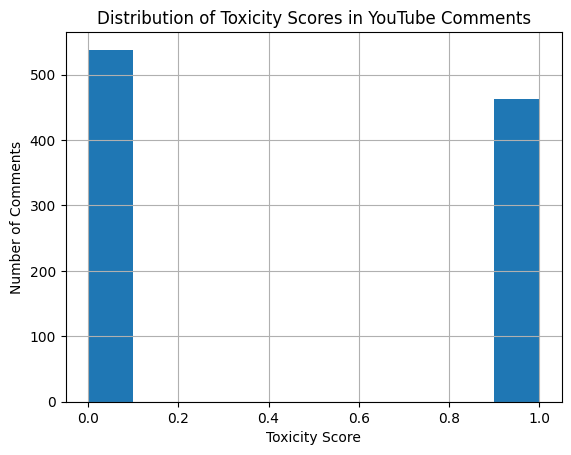

In [7]:
toxicity =df['IsToxic']

# Create the histogram
toxicity_numeric = toxicity.astype(int)

plt.hist(toxicity_numeric)
plt.xlabel('Toxicity Score')
plt.ylabel('Number of Comments')
plt.title('Distribution of Toxicity Scores in YouTube Comments')
plt.grid(True)
plt.show()

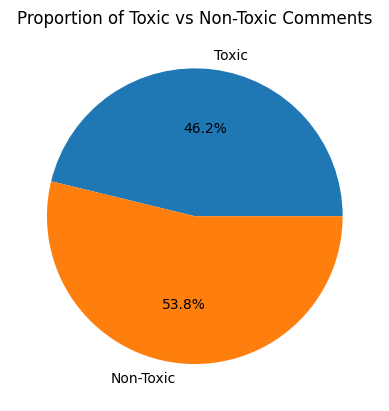

In [8]:
toxicity =df['IsToxic']

# Create the pie chart
toxicity_numeric = toxicity.astype(int)
n_toxic = len(df[toxicity_numeric > 0.5])
n_nontoxic = len(df) - n_toxic

labels = ['Toxic', 'Non-Toxic']

pie_sizes = [n_toxic / len(df), n_nontoxic / len(df)]

plt.pie(pie_sizes, labels=labels, autopct="%1.1f%%")
plt.title('Proportion of Toxic vs Non-Toxic Comments')
plt.show()

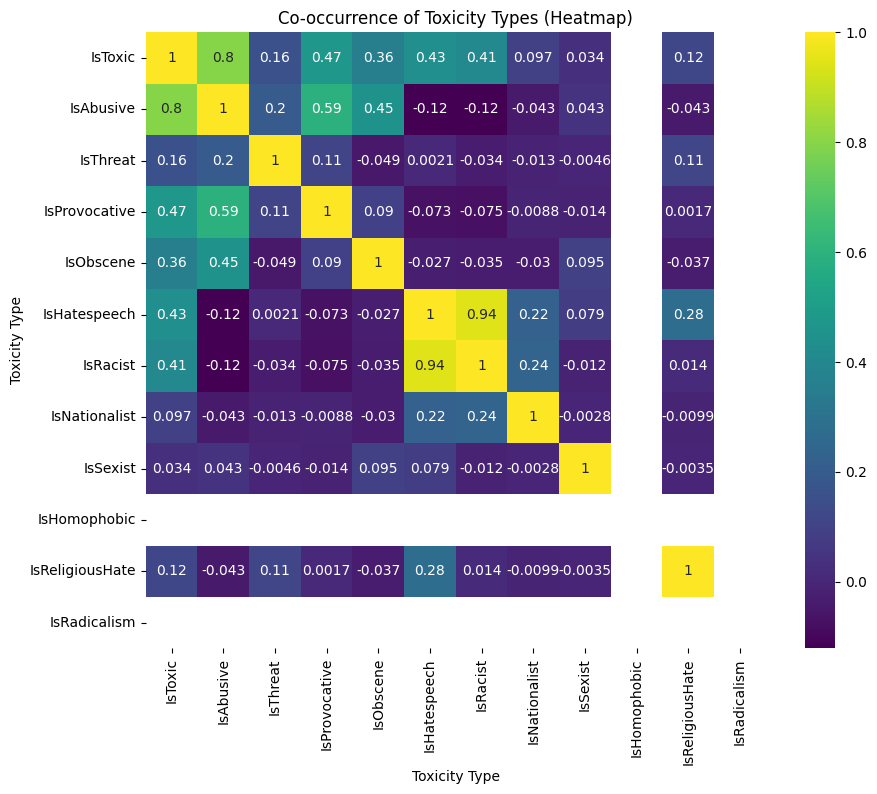

In [9]:

# Select relevant columns (assuming your data has IsAbusive, IsThreat, etc. columns)
toxic_types = ['IsToxic','IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech','IsRacist','IsNationalist','IsSexist','IsHomophobic','IsReligiousHate','IsRadicalism']
toxicity_data = df[toxic_types]

# Create a co-occurrence matrix
cooccurrence_matrix = toxicity_data.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(cooccurrence_matrix, annot=True, cmap='viridis')
plt.title('Co-occurrence of Toxicity Types (Heatmap)')
plt.xlabel('Toxicity Type')
plt.ylabel('Toxicity Type')
plt.show()

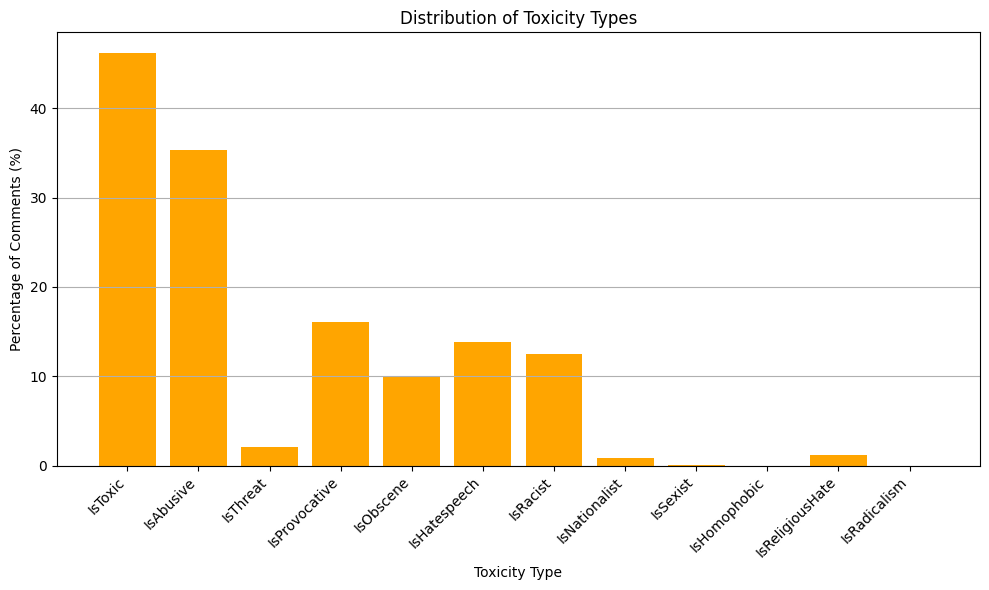

In [10]:
toxic_types = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
               'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
               'IsReligiousHate', 'IsRadicalism']

# Calculate percentage of comments for each type
n_comments = len(df)
percentages = []
for col in toxic_types:
  n_toxic = len(df[df[col] == 1])  # Count comments with toxicity type = 1
  percentage = (n_toxic / n_comments) * 100  # Calculate percentage
  percentages.append(percentage)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
plt.bar(toxic_types, percentages, color='orange')
plt.xlabel('Toxicity Type')
plt.ylabel('Percentage of Comments (%)')
plt.title('Distribution of Toxicity Types')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on the y-axis
plt.tight_layout()  # Adjust spacing for labels and title
plt.show()

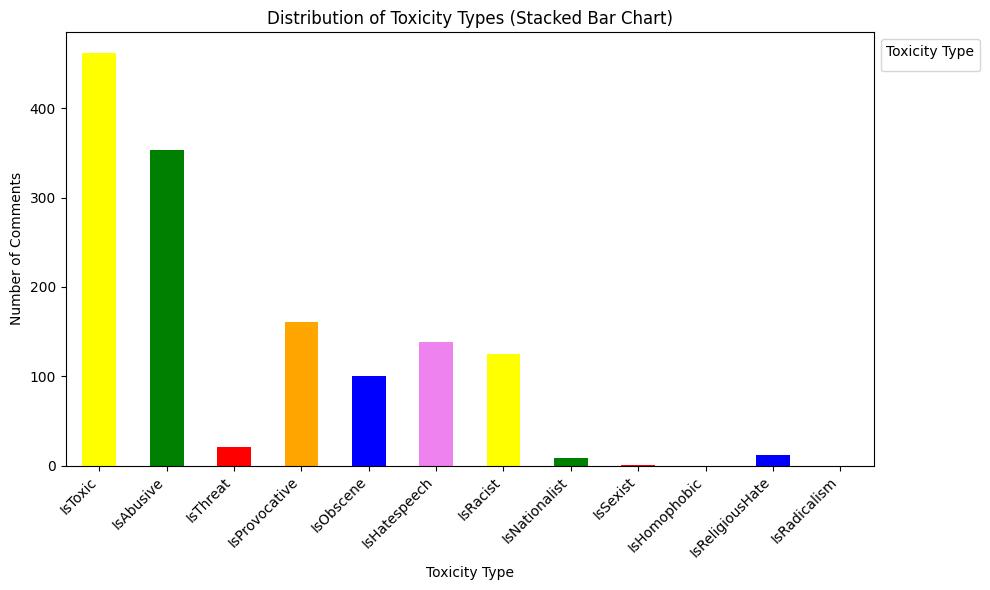

In [11]:

# Select toxic types
toxic_types = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
               'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
               'IsReligiousHate', 'IsRadicalism']

# Count comments for each type
type_counts = df[toxic_types].sum()

# Create the stacked bar chart
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
colors=["yellow","green","red","orange","blue","violet","yellow","green","red","orange","blue","violet"]
type_counts.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Toxicity Type')
plt.ylabel('Number of Comments')
plt.title('Distribution of Toxicity Types (Stacked Bar Chart)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Toxicity Type', loc='upper left', bbox_to_anchor=(1, 1))  # Add legend
plt.tight_layout()  # Adjust spacing for labels and title
plt.show()


In [12]:
duplicate_rows = df.duplicated()
# Count the number of rows marked as duplicate (having True values)
number_of_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {number_of_duplicates}")

duplicate_cols = df.duplicated()
# Count the number of rows marked as duplicate (having True values)
number_of_duplicates = duplicate_cols.sum()
print(f"Number of duplicate cols: {number_of_duplicates}")

Number of duplicate rows: 0
Number of duplicate cols: 0


In [13]:
duplicate_rows = df[df.duplicated(subset=['Text'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

# Drop duplicate comments
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)

# Confirm duplicates are removed
print("Number of rows after removing duplicates:", len(df))

# Reindex the DataFrame after dropping duplicates
df.reset_index(drop=True,inplace=True)

Duplicate rows based on 'Text' column:
                      CommentId      VideoId           Text  IsToxic  \
592        UgiXm5jxvkdIxHgCoAEC  cT14IbTDW2c  RUN THEM OVER     True   
642  Ugxen2QgJYhNiRrMegR4AaABAg  cT14IbTDW2c  run them over     True   
657  UgxXtUmfp0rdwXB8qld4AaABAg  cT14IbTDW2c  run them over     True   
677  UgyjhPsMlWKlFNmG-h94AaABAg  cT14IbTDW2c  run them over     True   
699  UgzFZGnqcjZcW7wejI54AaABAg  cT14IbTDW2c  RUN THEM OVER     True   

     IsAbusive  IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
592       True     False           True      False         False     False   
642       True      True          False      False         False     False   
657       True     False           True      False         False     False   
677       True     False           True      False         False     False   
699       True     False           True      False         False     False   

     IsNationalist  IsSexist  IsHomophobic  IsReligiousHate

In [14]:
duplicate_rows = df[df.duplicated(subset=['VideoId'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

Duplicate rows based on 'Text' column:
                CommentId      VideoId  \
0    Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1    Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2    Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3    Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4    Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   
..                    ...          ...   
992  Ugi5ADt10EdDz3gCoAEC  XRuCW80L9mA   
993  Ugifh2DMhBbDkHgCoAEC  XRuCW80L9mA   
994  Ugj_plbGBjjzYXgCoAEC  XRuCW80L9mA   
995  Ugj0bah1De8xy3gCoAEC  XRuCW80L9mA   
996  UgjBJKQSoQMQ6ngCoAEC  XRuCW80L9mA   

                                                  Text  IsToxic  IsAbusive  \
0    If only people would just take a step back and...    False      False   
1    Law enforcement is not trained to shoot to app...     True       True   
2    \nDont you reckon them 'black lives matter' ba...     True       True   
3    There are a very large number of people who do...    False      False   
4    The Arab dude is absolutely right, he should h...    False   

In [15]:
df['VideoId'].unique()

array(['04kJtp6pVXI', '4rCweDxDqdw', '5vF4si3hoRA', '8HB18hZrhXc',
       '9pr1oE34bIM', 'bUgKZMSxr3E', 'cT14IbTDW2c', 'dDbRyFIkNII',
       'dG7mZQvaQDk', 'Dt9-byUhPdg', '#NAME?', 'TZxEyoplYbI',
       'XRuCW80L9mA'], dtype=object)

In [ ]:
# Steps to make an imbalanced datset into balanced one

In [16]:
from wordcloud import WordCloud

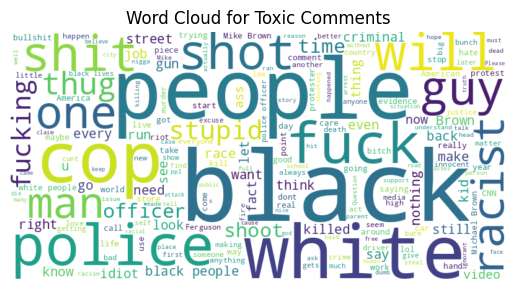

In [17]:
# based on frequency of words
toxic_comments = ' '.join(df[df['IsToxic']]['Text'])
wordcloud_toxic = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

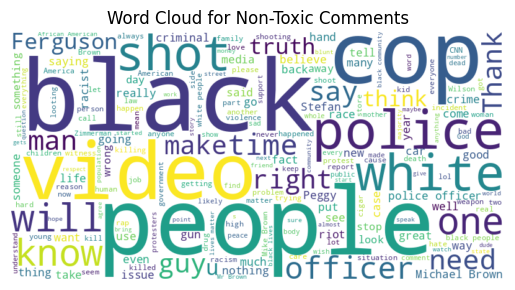

In [18]:
non_toxic_comments = ' '.join(df[~df['IsToxic']]['Text'])
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

In [ ]:
# Preprocessing

In [19]:
import re

import nltk
stopwords = nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')

    stop_words = stopwords.words('english')
    tokens = text.split()
    filtered_words = [word for word in tokens if word not in stop_words]
    text = ''.join(filtered_words)
    return text
    # Removing Stop words,punctuation marks and white space

In [21]:
df['Text'] = df['Text'].map(lambda com : clean_text(com))

In [28]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,peoplewouldtakestepbackmakecaseanyoneexcepttwo...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,lawenforcementtrainedshootapprehendtrainedshoo...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,dontreckonblacklivesmatterbannersheldwhitecunt...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,largenumberpeoplelikepoliceofficerscalledcrimi...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,arabdudeabsolutelyrightshot6extratimeshoothesa...,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Vectorize

In [22]:
# Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=5000,stop_words='english')
X = vect.fit_transform(df['Text'])
y=df['IsToxic']

In [ ]:
#The dataset is unbalanced. There are multiple comments on a few videos.

#SMOTE (Synthetic Minority Over-Sampling Technique): Creates synthetic samples for the minority class to balance the class distribution.

#Edited Nearest Neighbors (ENN): Removes noisy or misclassified data points from both the majority and minority classes.

In [23]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [24]:
X_resampled

<538x993 sparse matrix of type '<class 'numpy.float64'>'
	with 617 stored elements in Compressed Sparse Row format>

In [25]:
y_resampled

0      True
1      True
2      True
3      True
4      True
       ... 
533    True
534    True
535    True
536    True
537    True
Name: IsToxic, Length: 538, dtype: bool

In [26]:

# Convert the oversampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled.todense(), columns=vect.get_feature_names_out())
df_resampled['Toxic'] = y_resampled

# Check the distribution after oversampling
toxic_distribution_after = df_resampled['Toxic'].value_counts()
print("\nDistribution after SMOTE:")
print(toxic_distribution_after)


Distribution after SMOTE:
Toxic
True    538
Name: count, dtype: int64


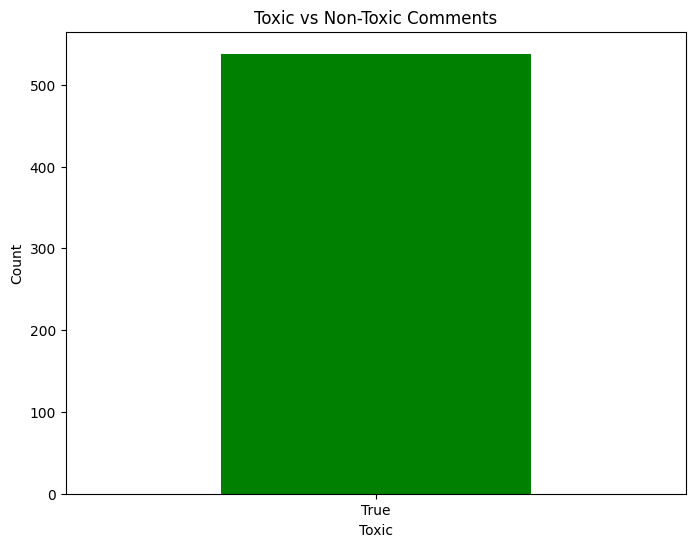

In [27]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = df_resampled['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Model Training and Testing

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [35]:
X_train

<430x993 sparse matrix of type '<class 'numpy.float64'>'
	with 492 stored elements in Compressed Sparse Row format>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [30]:
max_features = 10000

embedding_dim = 128

max_len=200
lstm_units=64

In [31]:
model = Sequential()

# Embedding layer (convert tokens to vectors)
model.add(Embedding(max_features, embedding_dim, input_length=max_len))

# LSTM layer (capture sequential information)
lstm_units = 64
model.add(LSTM(units=lstm_units))

# Dense layer (classification)
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert to dense array and ensure float32 data type
X_train_dense = X_train.toarray().astype('float32')
X_train_padded = pad_sequences(X_train_dense, maxlen=max_len)

print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of y_train:", y_train.shape)

# Check if data is empty
print("Number of samples in X_train_padded:", X_train_padded.shape[0])
print("Number of samples in y_train:", y_train.shape[0])

result = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)
result

Shape of X_train_padded: (430, 200)
Shape of y_train: (430,)
Number of samples in X_train_padded: 430
Number of samples in y_train: 430
Epoch 1/5
11/11 [==============================] - 5s 211ms/step - loss: 0.5136 - accuracy: 0.9070 - val_loss: 0.1689 - val_accuracy: 1.0000
Epoch 2/5
11/11 [==============================] - 2s 154ms/step - loss: 0.0539 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 3/5
11/11 [==============================] - 3s 247ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4/5
11/11 [==============================] - 2s 199ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/5
11/11 [==============================] - 2s 156ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000


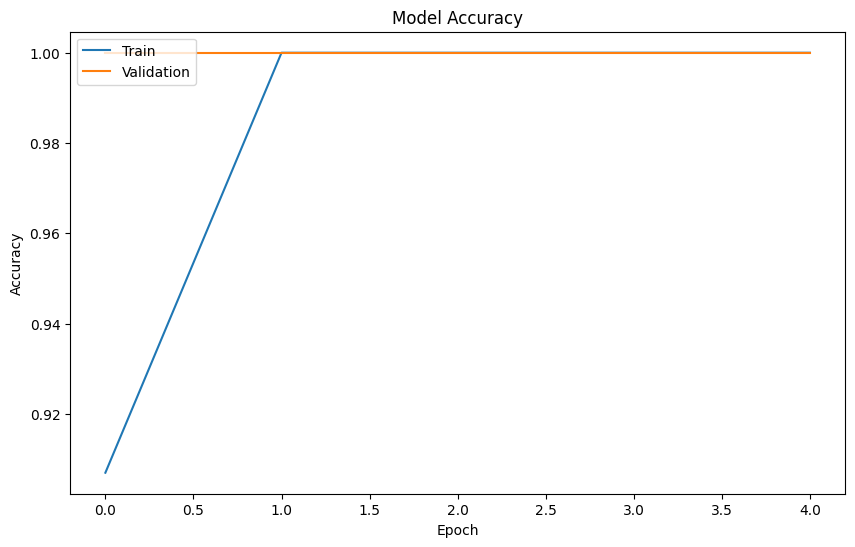

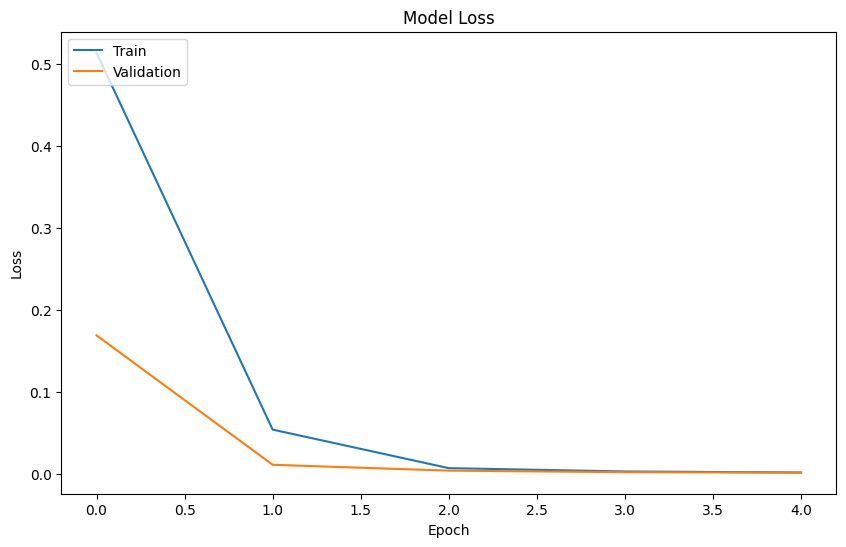

In [37]:

plt.figure(figsize=(10, 6))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:


if hasattr(X_test, 'toarray'):
    X_test_dense = X_test.toarray().astype('float32')
    X_test_padded = pad_sequences(X_test_dense, maxlen=max_len)
else:
    X_test_padded = X_test

loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", accuracy)


4/4 [==============================] - 0s 58ms/step - loss: 0.0013 - accuracy: 1.0000
Test Accuracy: 1.0


In [39]:
from sklearn.metrics import classification_report

y_pred_proba = model.predict(X_test_padded)
y_pred = (y_pred_proba > 0.5).astype(int)

report = classification_report(y_test, y_pred)
print(report)


4/4 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

        True       1.00      1.00      1.00       108

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



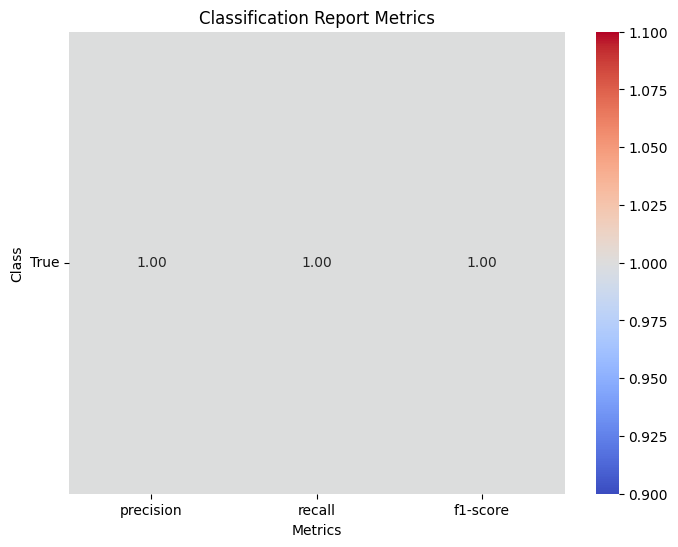

In [40]:
report = classification_report(y_test, y_pred,  output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Extract relevant metrics for visualization
class_metrics = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotting the classification report metrics using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.yticks(rotation=0)
plt.show()